In [1]:
#IMPORTING DEPENDENCIES
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [2]:
#LOADING DATA
from google.colab import files
files.upload()

Saving ETH-USD.csv to ETH-USD.csv


{'ETH-USD.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\r\n14-12-20,589.782471,590.492981,577.118408,586.011169,586.011169,8125837102\r\n15-12-20,586.02179,596.247742,580.628784,589.355591,589.355591,9326645840\r\n16-12-20,589.378662,636.64032,582.039124,636.181824,636.181824,15817248373\r\n17-12-20,636.154175,673.834229,628.74939,642.868958,642.868958,25479532147\r\n18-12-20,642.916992,662.699097,632.356079,654.811951,654.811951,15756303983\r\n19-12-20,654.624207,668.769592,646.616211,659.297913,659.297913,12830893778\r\n20-12-20,659.185059,659.923706,625.014465,638.290833,638.290833,13375855442\r\n21-12-20,638.315186,646.846558,600.83606,609.817871,609.817871,14419493621\r\n22-12-20,609.420532,635.076599,589.552002,634.854187,634.854187,14745890080\r\n23-12-20,634.824585,637.122803,560.364258,583.7146,583.7146,15261413038\r\n24-12-20,584.13562,613.815186,568.596375,611.607178,611.607178,14317413703\r\n25-12-20,611.554565,633.061401,605.424438,626.410706,626.410706,13520927700\r\n

In [3]:
#Get and store the data
#store the data
df = pd.read_csv('ETH-USD.csv')
df=df.set_index(pd.DatetimeIndex(df['Date']).values)
#show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2020-12-14,14-12-20,589.782471,590.492981,577.118408,586.011169,586.011169,8125837102
2020-12-15,15-12-20,586.021790,596.247742,580.628784,589.355591,589.355591,9326645840
2020-12-16,16-12-20,589.378662,636.640320,582.039124,636.181824,636.181824,15817248373
2020-12-17,17-12-20,636.154175,673.834229,628.749390,642.868958,642.868958,25479532147
2020-12-18,18-12-20,642.916992,662.699097,632.356079,654.811951,654.811951,15756303983
...,...,...,...,...,...,...,...
2021-10-12,10-12-21,4113.588379,4227.111816,3897.767578,3908.496094,3908.496094,28014595631
2021-11-12,11-12-21,3909.667725,4095.648438,3846.054443,4084.452393,4084.452393,19131502454
2021-12-12,12-12-21,4084.811279,4173.608887,3993.055908,4134.453125,4134.453125,14057603914
2021-12-13,13-12-21,4136.359863,4145.955078,3680.609131,3784.226807,3784.226807,23999841386


In [ ]:
#Data cleaning
df.dropna(inplace=True) 

In [8]:
#create a variable for prediction 'n' days out into the future
projection = 15
#create a new column called prediction
df['Prediction'] = df[['Close']].shift(-projection)
#Show the data set
df

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
2020-12-14,14-12-20,589.782471,590.492981,577.118408,586.011169,586.011169,8125837102,731.520142
2020-12-15,15-12-20,586.021790,596.247742,580.628784,589.355591,589.355591,9326645840,751.618958
2020-12-16,16-12-20,589.378662,636.640320,582.039124,636.181824,636.181824,15817248373,737.803406
2020-12-17,17-12-20,636.154175,673.834229,628.749390,642.868958,642.868958,25479532147,730.367554
2020-12-18,18-12-20,642.916992,662.699097,632.356079,654.811951,654.811951,15756303983,774.534973
...,...,...,...,...,...,...,...,...
2021-10-12,10-12-21,4113.588379,4227.111816,3897.767578,3908.496094,3908.496094,28014595631,NaN
2021-11-12,11-12-21,3909.667725,4095.648438,3846.054443,4084.452393,4084.452393,19131502454,NaN
2021-12-12,12-12-21,4084.811279,4173.608887,3993.055908,4134.453125,4134.453125,14057603914,NaN
2021-12-13,13-12-21,4136.359863,4145.955078,3680.609131,3784.226807,3784.226807,23999841386,NaN


In [9]:
#creating the independent data set "X"
X = np.array(df[['Close']])
#remove the last 15 rows
X = X[:-projection]
print(X)

[[ 586.011169]
 [ 589.355591]
 [ 636.181824]
 [ 642.868958]
 [ 654.811951]
 [ 659.297913]
 [ 638.290833]
 [ 609.817871]
 [ 634.854187]
 [ 583.7146  ]
 [ 611.607178]
 [ 626.410706]
 [ 635.835815]
 [ 682.642334]
 [ 730.397339]
 [ 731.520142]
 [ 751.618958]
 [ 737.803406]
 [ 730.367554]
 [ 774.534973]
 [ 975.50769 ]
 [1040.233032]
 [1100.006104]
 [1207.112183]
 [1225.678101]
 [1224.197144]
 [1281.077271]
 [1262.246704]
 [1090.145386]
 [1043.43457 ]
 [1130.73938 ]
 [1218.453003]
 [1171.834595]
 [1233.537598]
 [1230.172241]
 [1257.279541]
 [1377.295898]
 [1382.274048]
 [1121.570923]
 [1236.512207]
 [1230.990601]
 [1391.609375]
 [1324.414795]
 [1357.058105]
 [1253.187134]
 [1298.101807]
 [1382.522827]
 [1376.115479]
 [1314.986206]
 [1369.040527]
 [1515.193726]
 [1660.909546]
 [1594.762695]
 [1718.650879]
 [1677.846802]
 [1614.227783]
 [1746.616821]
 [1768.035034]
 [1744.243408]
 [1783.797974]
 [1843.532593]
 [1814.109863]
 [1805.084106]
 [1779.791016]
 [1781.067505]
 [1848.458252]
 [1937.449

In [10]:
#Creating dependent data  set "Y"
y = df['Prediction'].values
y = y[:-projection]
print(y)

[ 731.520142  751.618958  737.803406  730.367554  774.534973  975.50769
 1040.233032 1100.006104 1207.112183 1225.678101 1224.197144 1281.077271
 1262.246704 1090.145386 1043.43457  1130.73938  1218.453003 1171.834595
 1233.537598 1230.172241 1257.279541 1377.295898 1382.274048 1121.570923
 1236.512207 1230.990601 1391.609375 1324.414795 1357.058105 1253.187134
 1298.101807 1382.522827 1376.115479 1314.986206 1369.040527 1515.193726
 1660.909546 1594.762695 1718.650879 1677.846802 1614.227783 1746.616821
 1768.035034 1744.243408 1783.797974 1843.532593 1814.109863 1805.084106
 1779.791016 1781.067505 1848.458252 1937.449219 1960.164795 1919.534058
 1935.601074 1781.99292  1570.203979 1626.575684 1475.703735 1446.033691
 1459.973145 1416.04895  1564.707642 1492.608765 1575.853149 1541.914307
 1533.275024 1654.741577 1723.153809 1834.727905 1868.048828 1799.16626
 1826.194946 1772.102417 1924.685425 1854.564331 1791.702271 1806.971802
 1823.449341 1782.855103 1817.624146 1812.634644 1788

In [11]:
#splitting data into 85% training and 15% testing data sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = .15)


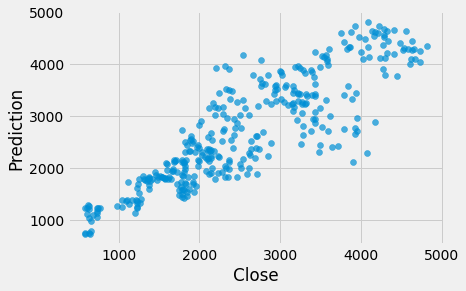

In [38]:
plt.scatter(X,y,alpha=.7)
plt.xlabel('Close')
plt.ylabel('Prediction')
plt.show()


In [12]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, gamma=1e-05)

In [18]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr accuracy:', svr_rbf_confidence)


svr accuracy: 0.7376432254877372


In [19]:
svm_prediction= svr_rbf.predict(x_test)
print(svm_prediction)

[2577.94709589 4435.93516865 2505.96055804 2830.46984997 3285.7773678
 1899.58267812 2387.19922008 3665.39392131 3284.59222323 4362.83884264
 3410.18159846 1189.56093868 2568.81213556 2487.87014766 1856.63541325
 4364.00854337 3803.54890612 2052.09851344 1142.7763456  2332.60086813
 1404.89561526 2335.28646712 1144.57036972 2523.64434291 3318.4397057
 1375.76910868 1958.90718227 2074.85620055 2150.85480864 3560.60493157
 1972.41077996 1928.49086956 2338.81233447 2040.48302938 3732.499562
 4288.34371377 1891.88872921 2018.76069044 2408.53217994 4299.38833532
 3389.68501503 4404.93554419 1948.80911372 3736.49036191 1828.75630157
 3369.71011293 3396.66058046 3362.79931089 3569.60110619 3863.58460772
 1139.26822625 2569.80688001 3336.75727315]


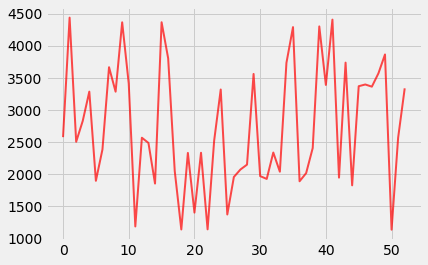

In [32]:

plt.plot(svm_prediction, color = 'red', lw=2, alpha=.7)

In [30]:
#actual values
print(y_test)

[2608.26709  4620.554688 2226.114258 3580.562012 3244.40332  1782.855103
 2517.438721 3001.678955 3426.394287 4626.358887 2931.669189 1218.453003
 3952.293945 2630.576904 1772.102417 4216.365234 2706.628906 2561.852051
 1040.233032 2590.263184 1257.279541 2191.373779  737.803406 3484.729004
 3285.511719 1253.187134 1595.359253 2519.116211 2036.721069 3270.60083
 2502.349609 1475.703735 4168.701172 2324.679443 2643.591064 4096.912109
 1817.624146 1593.413452 1994.331299 4134.453125 3497.315186 4557.503906
 1446.033691 4730.384277 1924.685425 2471.518555 3172.456299 3391.694336
 3862.634766 4521.581055  730.367554 3522.783203 2706.125   ]


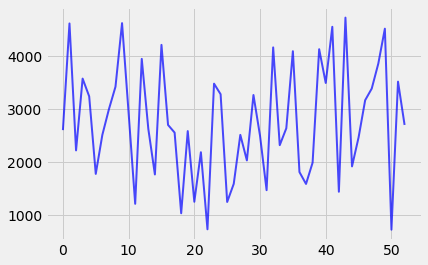

In [33]:
plt.plot(y_test, color = 'blue', lw=2, alpha=.7)

In [14]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

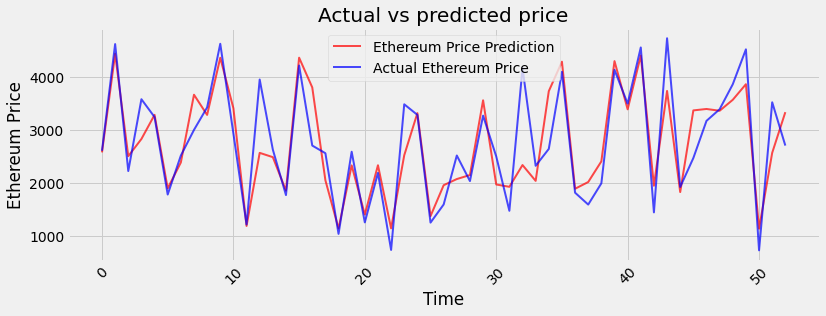

In [31]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction, color = 'red', label = 'Ethereum Price Prediction', lw=2, alpha=.7)
plt.plot(y_test, color = 'blue', label = 'Actual Ethereum Price', lw=2, alpha=.7)
plt.title('Actual vs predicted price')
plt.xlabel('Time')
plt.ylabel('Ethereum Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()